<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Christopherlopmx/blob/main/IBM_Semana_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ahora si viene lo bueno!! En esta parte vamos a aprender como hacer modelos predictivos!!

Vamos a usar:

Regresion Lineal, en sus modelos simples, multiple y polinomial

Aquí mejor vamos a ir directo al LAB de cada parte, porque esto esta muy interesante y vamos a ir poniendo los comentarios.

In [2]:
# necesitamos estas librerías de python para ver regresiones:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# los datos:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [4]:
#Aquí la tabla/df

df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
# Pasos para hacer la regresion linea:
# debemos traer desde  sklearn.linear_model los modulos para regresion lineal

from sklearn.linear_model import LinearRegression

In [7]:
# ya con estos modulos, así creamos un objeto para la regresion
lm = LinearRegression()
lm

LinearRegression()

Este modelo de regresion lineal predice el precio del vehículo usando el highway-mpg

In [9]:
#definimos los array para x y para y lo que se va a usar en el plano:
X = df[['highway-mpg']]
Y = df['price']

In [10]:
print(X)

     highway-mpg
0             27
1             27
2             26
3             30
4             22
..           ...
196           28
197           25
198           23
199           27
200           25

[201 rows x 1 columns]


In [13]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64


In [14]:
#ahora vamos a hacer un "fit" a la regresion linea, que basicamente es aplicar la formular de y=mx+b

lm.fit(X,Y)

LinearRegression()

In [18]:
#Listo, ya lo hiciste una regresion lineal, pretty neat... bueno, ahora puedes hacer predicciones:

Yhat=lm.predict(X)
Yhat[0:5]  # no entendí esto, creo que es decirle de 0 a 5 pero no estoy seguro, ¿si estas viendo esta parte profesor me podrías orientar por favor?

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [20]:
#puedes ahora sacar un monton de cosas extra de aquí, como la pendiente, y el punto donde tocan en el plano en 0
lm.intercept_  #esto es la intercepción (toca en 0)

38423.3058581574

In [21]:
lm.coef_ #esto es la pendiente.

array([-821.73337832])

Ahora vamos a hacerlo donde el tamaño del motor predice el precio:

In [23]:
lm1 = LinearRegression()
lm1

lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [24]:
lm1.coef_

array([[166.86001569]])

In [25]:
lm1.coef_

array([[166.86001569]])

Una regresion lineal de solo 1 variable se ve así:

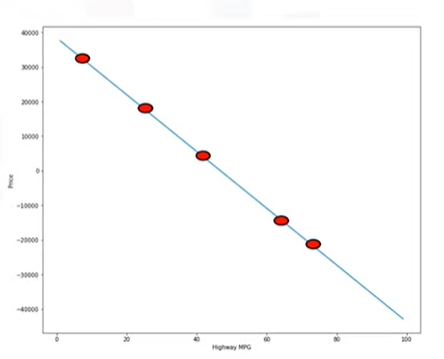

Aunque esta interesante, en el modelo de datos que tenemos hay más de una variable influyendo en nuestro valor precio. 

Entonces podemos decir que un modelo de regresión lineal multiple sería el adecuando. 

Vamos a ver como quedaría con python!

In [27]:
#Z va a ser el nuevo df y vamos a tener esas columnas:

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


In [28]:
#Ahora vamos a hacerle el fit, para meterle la variable que estas se suponen deben predecir, que es el precio, osea nuestra Y

lm.fit(Z, df['price'])

LinearRegression()

In [30]:
#También tenemos intercepción y pendiente

lm.intercept_

-15806.62462632922

In [31]:
#pendienteS
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

O sea nuestra regresión serí:

Price = -15806.62462632922 + 53.49574423 x horsepower + 4.70770099 x curb-weight + 81.53026382 x engine-size + 36.05748882 x highway-mpg

Es ir multiplicando cada Xn por el valor de su pendiente y sumarle o la intercepción.

Una regresion de multiples variables se ve así:

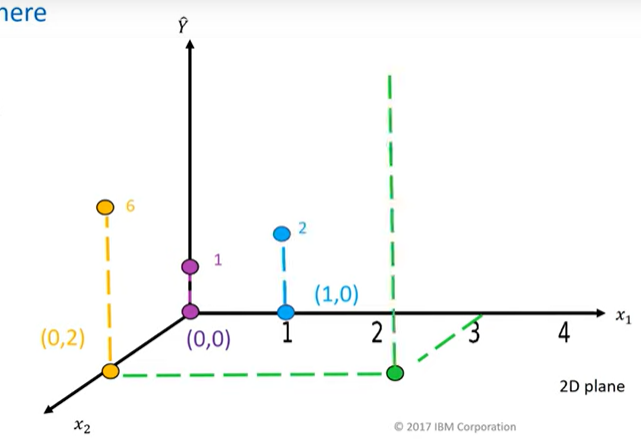

Ok, muy bonito y todo, ¿pero como sabes que para los datos que estas usando lo mejor era una regresión lineal?

Supongo que debe haber una forma usando metodos y librerías de python, donde los resultados en algun rango te digan "ok, esto no era bueno para ser regresion lineal", peeero ahora mismo, lo que nos dicen en el curso es que necesitamos analizar esto de forma vizual y para todo este relajo exite una nueva herramienta de librerías que se llama: seaborn... lord of the tides!

In [32]:
import seaborn as sns
%matplotlib inline

(0.0, 48184.04966807549)

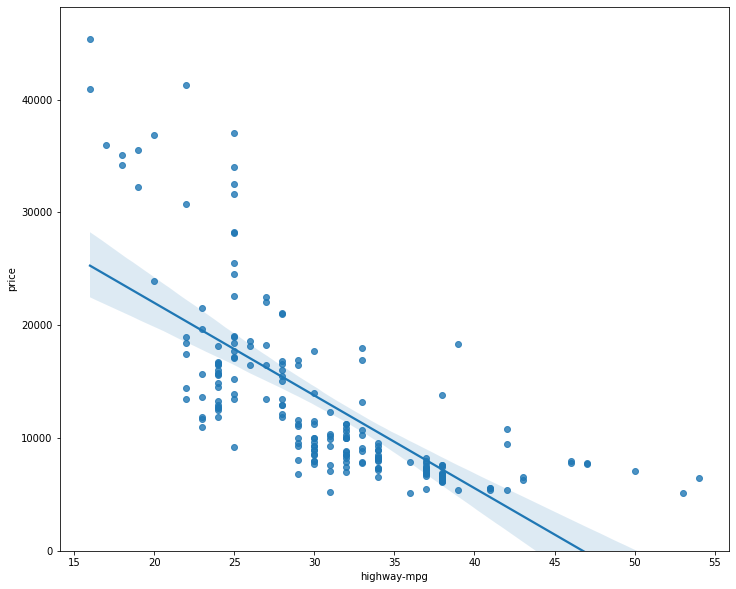

In [33]:
#ok, ahora vamos a hacer una gráfica de regresion lineal donde highmay-mpg es el predictor de precio
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

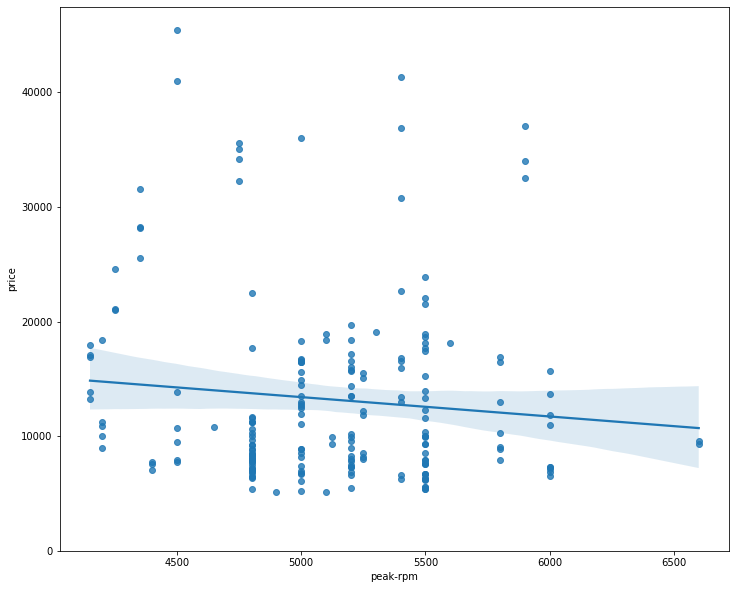

In [34]:
#interesante, que tal se vería otra variable, esta ves peak-rpm

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [35]:
#Jumm, parece que es mejor el otro que rpm, como estará la correlacion?

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [ ]:
#ahí esta! hay más correlación entre highway y price que peak y price, por eso la regresión sigue mucho más facilmente a los precios en la otra

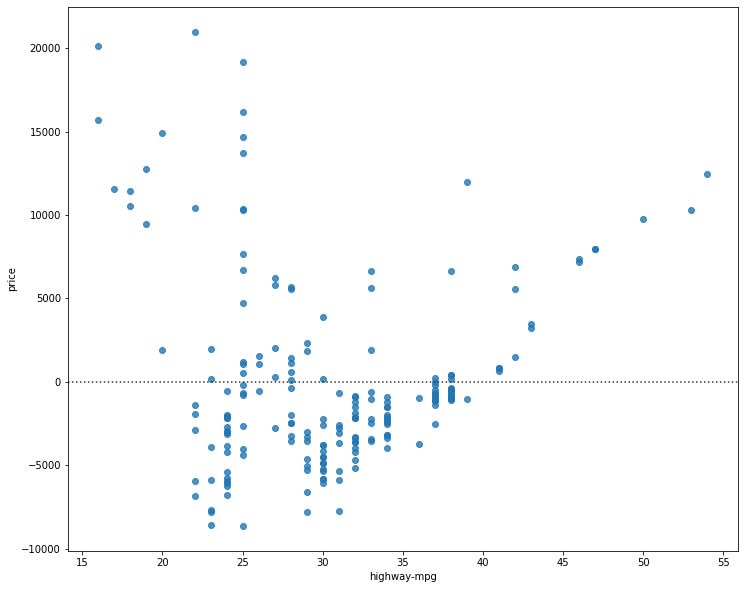

In [36]:
#Pero seguimos sin poder resolver la pregunta. ¿Cómo sabemos que una regresion lineal es buena para hacer un modelo predictivo?

#Bueno, todo depende de como estan distribuídos los datos, en el caso de las regresiones lineales, lo daots estan distribuídos de forma aleatorea
#esto significa que la varianza es constante! y si la varianza es constante, entonces hay una pendiente, entonces hay un cruce, entonces estas viendo a una
#regresión lineal!

#Para revisar esto, hacemos una gráfica que se llama "residual plot", esto grafica los valores residuales entre
#la proyeción YHAT y los valores independientes Y

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [ ]:
# Esto no parece ser aleatoreo. Vemos en rango valores positivos y luego rangos de valores negativos. ¿tal vez un modelo no lineal es más apropiado?

In [ ]:
# Peero no esta tan facil visualizar una ecuación de regresión multiple, supongo que por el tema de los planos (o sea más dimensiones? buuu)

#Por lo tanto se debe graficar la distribucion, o sea la distribution plot

In [37]:
#Paso 1 hacer una predicción

Y_hat = lm.predict(Z)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


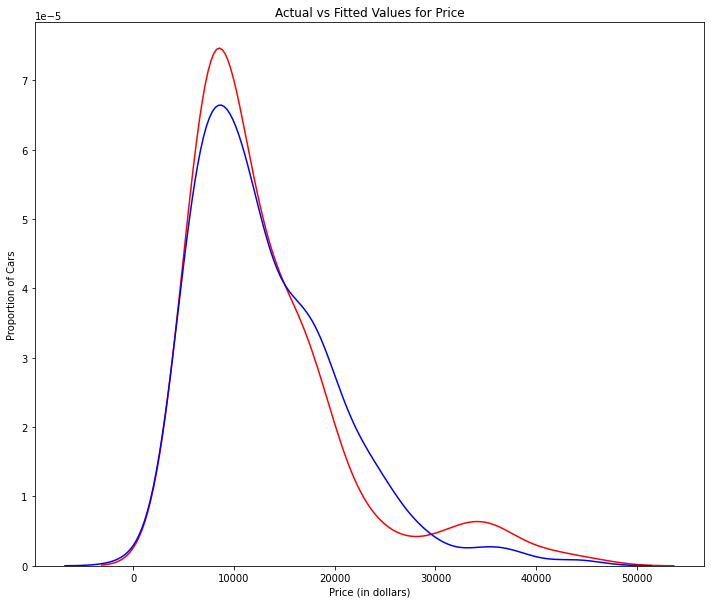

In [38]:
#Paso 2... no se, supongo que hacer el plot?

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Que pasa entonces si más bien los datos no describen una regresion lineal simple o multplible, entonces puede ser polinomial. Basicamente los datos se van a ver como "S" o curvas a lo largo de la proyección, mira:

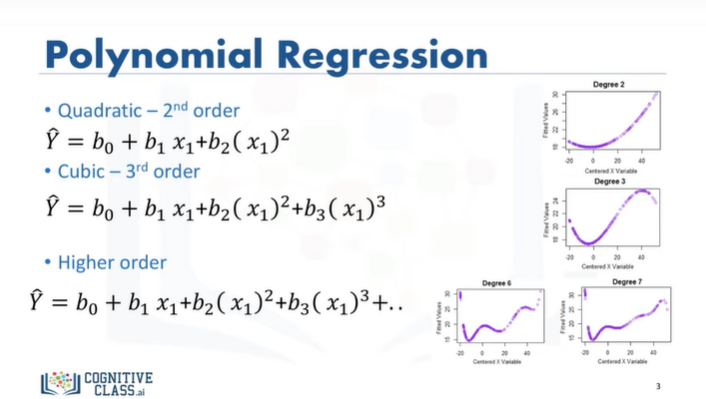

In [ ]:
#Esto parece ser muy complicado para hacerlo de forma directa, entonces se deben usar unas cosas que se llaman
#pipelines, donde tomas los variables del modelo y las metes en un tuple con unos métodos especiales para luego hacer las regresiones.


In [39]:
# Entonces en el ejemplo de arriba no salio tan bien con highway-mpg, porque aunque había correlacion, los valores al ser ploteados
# de forma residual, no mostraban una varianza constante, o sea no eran aleatoreos, es decir hay un patron

#Vamos a usar entonce el siguiente código para meterle a esto una función polinomial y ver si el "Fit", aquí si queda.

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [40]:
#aquí estamos trayendo la información para x y abajo para y que van a ir en el modelo

x = df['highway-mpg']  
y = df['price']

In [52]:
#aquí hacemos el fit, polinomial, se pone que son 3 por el número de variables??? o es porque es de tercer orden? jumm

f = np.polyfit(x, y, 3) # el 3 es el numero de polinomios? jaja no se como se dice, pero es la S acostadita si le mueves a 2 es la U y si usas números más altos cambia la funcion
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


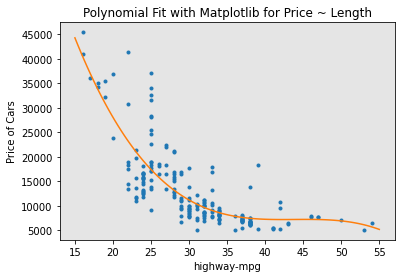

In [53]:
# Vamos a graficar

PlotPolly(p, x, y, 'highway-mpg')

In [54]:
#Entonces si creo que es 3 porque es de 3er orden

np.polyfit(x, y, 3) # estos son los valores dentro de la funcion

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


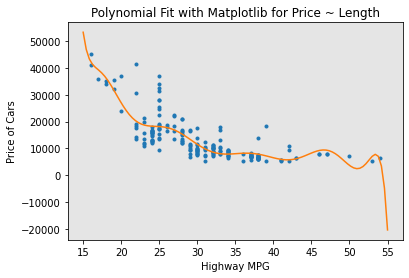

In [55]:
#Vamos a ver uno de un orden más alto!! Que tal 11

f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [67]:
Z_pr=pr.fit_transform(Z)

In [68]:
Z.shape # Esta es la data original 201 samples and 4 features.

(201, 4)

In [69]:
Z_pr.shape # Esta es la data transformada 201 samples and 15 features en un polinomio de 2do grado

(201, 15)

Data Pipelines es un proceso donde se simplifica todo este tema de procesar datos para una ecuación polinomial.

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [71]:
# Para hacer el pipe line se debe hacer una lista de tuples donde aparezca el nombre del modelo y el constructor? (wtf is this?)

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())] #aaa constructor es linearregression dhaa.. pero polinomial

In [72]:
#Ahora ponemos la información en pipeline constructor:

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [73]:
Z = Z.astype(float) # aquí estamos convirtiendo Z a Float por si las moscas, para que todo sea numeros
pipe.fit(Z,y) # y acá estamos haciendo el fit de la gráfica al normalizar los datos al modelo

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [74]:
ypipe=pipe.predict(Z)
ypipe[0:4] # aquí los inputos para las predicciones y el resultado son las predicciones... aunque se ve más padre en una gráfica...

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Measures for In-Sample Evaluation

Ahora viene como evaluar un modelo con matemáticas jaja, no gráficas, o sea formulas

In [ ]:
#Entonces para hacer estas validaciones se usan usalmente estos dos, sobre los datos a evaluar:


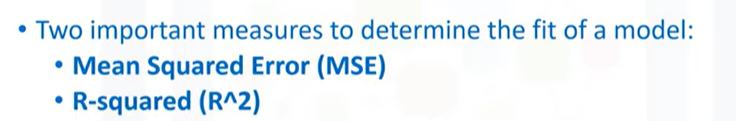

Basicamente queires un MSE bajo y un R2 alto. Eso significa que el modelo esta compartandose bien, o más bien que la función lineal que seleccionaste explica bien los datos y por lo tanto si la usas para predicciones es más probable que salga bien  :)

Por si las moscas, aquí te dejo la definición de los dos en ingles:

R^2 / R-squared
Mean Squared Error (MSE)

**R-squared** WE WANT THIS BIG (close to 1)

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the **percentage of variation of the response variable (y) **that is explained by a linear model.

**Mean Squared Error (MSE)**  WE WANT THIS SMALL (close to 0) *revisar esto porque lo que calcule después no tiene mucho sentido dada esta regla*

The Mean Squared Error measures the average of the squares of errors. That is, **the difference between actual value (y) and the estimated value (ŷ).**

In [75]:
# Calculemos R2 del modelo

#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [ ]:
# Esto dice que ~49.659% de la variación del precio es explicado con el modelo lineal sobre "horsepower_fit".

In [76]:
#Calculemos ahora el MSE

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [77]:
#Necesitamos calcular promediso del error al cuadraro y eso esta en sklearn

from sklearn.metrics import mean_squared_error

In [79]:
# Ahora se comparan los resultados de la predicción con los reales

mse = mean_squared_error(df['price'], Yhat)

print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [ ]:
#No se ve tan bien jaja, quieres un valor bajo no alto!!

In [ ]:
#Vamos a ver como se ven estos valores con los modelos polinomiales

In [81]:
#R2
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [ ]:
#Esta cañon, es 80.93%, esta bueno.

In [83]:
#¿Y el mse?

#genear una predicción

Y_predict_multifit = lm.predict(Z)

#comparar resultados vs prediccion

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [84]:
from sklearn.metrics import r2_score

In [85]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [86]:
mean_squared_error(df['price'], p(x))

20474146.426361218